# **Application of the SVM algorithm with different kernels.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

We use a dataset **"Set of ionosphere data"**.

This dataset requires prediction of the structure in the atmosphere, taking into account radar signals aimed at free electrons in the ionosphere.



In [2]:
data = pd.read_csv('ionosphere.data', names=[x for x in range(1, 35)] + ['result'])
data['result'] = data['result'].replace('g', 1).replace('b',0)

This is a binary classification problem. 

In [3]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,result
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


The number of observations for each class **is not balanced**. 

In [4]:
data[data.result == 1].shape[0], data[data.result == 0].shape[0]

(225, 126)

There are 351 observations with 34 input variables and 1 output variable named result.

In [5]:
data.shape

(351, 35)

Pre-processing of data:

In [6]:
values = data.drop('result', axis=1)
results = data['result']
values.head()

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697


Normalization with **MinMaxScaler**():

In [7]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
tmp_df = scaler.fit_transform(values)
scaled_df = pd.DataFrame(tmp_df, columns=values.columns)
scaled_df.head()

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
0,1.0,0.0,0.997695,0.470555,0.926215,0.511530,0.91699,0.311460,1.000000,0.518800,...,0.784055,0.244145,0.705390,0.269160,0.606330,0.329550,0.711335,0.227565,0.593205,0.273500
1,1.0,0.0,1.000000,0.405855,0.965175,0.319220,0.44566,0.032015,1.000000,0.477255,...,0.398340,0.367155,0.397660,0.407995,0.404800,0.442035,0.416870,0.468560,0.431310,0.487765
2,1.0,0.0,1.000000,0.483175,1.000000,0.502425,1.00000,0.439690,0.944825,0.505990,...,0.787640,0.298900,0.794920,0.389275,0.715500,0.413175,0.802180,0.379100,0.780225,0.308810
3,1.0,0.0,1.000000,0.274195,1.000000,1.000000,0.85608,0.000000,0.500000,0.500000,...,1.000000,0.953475,0.758065,1.000000,1.000000,0.399505,0.628410,1.000000,0.338090,1.000000
4,1.0,0.0,1.000000,0.487995,0.970700,0.532655,0.96053,0.383725,0.885760,0.418005,...,0.516430,0.174210,0.566450,0.233970,0.512155,0.189015,0.471465,0.202135,0.476960,0.171515


Splitting of the samples into training and test (20%):

In [8]:
from sklearn.model_selection import train_test_split
train_val, test_val, train_res, test_res = train_test_split(scaled_df,results, test_size=0.2)

**Default SVM** model training:

In [9]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', probability=True)
svc.fit(train_val, train_res)
pred_res = svc.predict(test_val)

Model evaluation:

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_res, pred_res))
print(classification_report(test_res, pred_res, target_names=['0', '1']))

[[16  8]
 [ 1 46]]
              precision    recall  f1-score   support

           0       0.94      0.67      0.78        24
           1       0.85      0.98      0.91        47

    accuracy                           0.87        71
   macro avg       0.90      0.82      0.85        71
weighted avg       0.88      0.87      0.87        71



SVM model with **Polynomial Kernel**:

In [11]:
svc_pol = SVC(kernel='poly', probability=True)
svc_pol.fit(train_val, train_res)
pred_pol = svc_pol.predict(test_val)
print(confusion_matrix(test_res, pred_pol))
print(classification_report(test_res, pred_pol, target_names=['0', '1']))

[[21  3]
 [ 1 46]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        24
           1       0.94      0.98      0.96        47

    accuracy                           0.94        71
   macro avg       0.95      0.93      0.94        71
weighted avg       0.94      0.94      0.94        71



SVM model with **RBF Kernel**:

In [12]:
svc_rbf = SVC(kernel='rbf', probability=True)
svc_rbf.fit(train_val, train_res)
pred_rbf = svc_rbf.predict(test_val)
print(confusion_matrix(test_res, pred_rbf))
print(classification_report(test_res, pred_rbf, target_names=['0', '1']))

[[19  5]
 [ 1 46]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.86        24
           1       0.90      0.98      0.94        47

    accuracy                           0.92        71
   macro avg       0.93      0.89      0.90        71
weighted avg       0.92      0.92      0.91        71



Function of drawing heatmaps:

In [13]:
def draw_conf_matrix(test_r, p1, p2, p3):
  m1 = confusion_matrix(test_r, p1)
  m2 = confusion_matrix(test_r, p2)
  m3 = confusion_matrix(test_r, p3)
  m_iter = iter((m1, m2, m3))
  name_iter = iter(('Default SVM', 'SVM with Poly kernel', 'SVM with RBF kernel'))
  fig, axn = plt.subplots(1, 3, sharex=True, sharey=True)
  fig.set_figheight(5)
  fig.set_figwidth(20)
  for ax in axn.flat:
    cf_matrix = next(m_iter)
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, ax=ax, annot=labels, fmt='', linewidths=0.01, center=5, cmap='Blues', linecolor='lightsteelblue')
    ax.set_title(next(name_iter))


**Heatmaps** of confusion matrix on train sample for every SVM kernel:

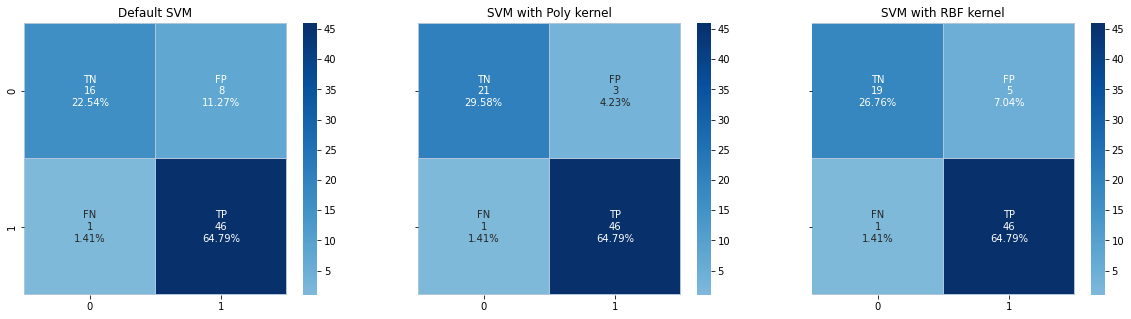

In [14]:
draw_conf_matrix(test_res, pred_res, pred_pol, pred_rbf)

According to the results, we can see that SVM with Polynomial kernel has the best accuracy - only 3 FP and 1 FN errors (4 in total). On second place - SVM with RBF kernel (6 errors in total). On third place - default SVM (9 errors in total).

Accuracy is not the best metric for evaluating the quality of a model (especially in the case of inbalanced classes). Due to the fact that the **AUC-ROC** criterion shows itself well in such situations, we will use this functionality to determine the quality.

Plotting **ROC curve** and calculating the area under it for every SVM instance:

In [15]:
from sklearn.metrics import roc_curve, auc

def plot(ax, test_r, prev_proba, name):
  fpr, tpr, thresholds = roc_curve(test_r, prev_proba[:,1])
  roc_area = auc(fpr, tpr)
  ax.set_facecolor('lightsteelblue')
  ax.grid(visible=True, c='lavender')
  ax.plot(fpr, tpr,'b-', label = f'ROC curve (area = {roc_area:0.2f})')
  ax.plot(fpr, tpr,'.k')
  ax.plot([0,1], [0,1],'r-', linestyle='dashed', label = 'Random guess')
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.set_title(f'ROC curve ({name})', fontsize=13) 
  legend = ax.legend(frameon = 1, loc='lower right')
  frame = legend.get_frame()
  frame.set_color('w')
  return roc_area

In [16]:
def plt_roc(test_re, proba_def, proba_pol, proba_rbf):
  fig, axes = plt.subplots(1,3)
  fig.set_figheight(6)
  fig.set_figwidth(24)
  x = plot(axes[0], test_re, proba_def, 'default SVM')
  y = plot(axes[1], test_re, proba_pol, 'Polynomial kernel SVM') 
  z = plot(axes[2], test_re, proba_rbf, 'RBF kernel SVM')
  return [x, y, z]

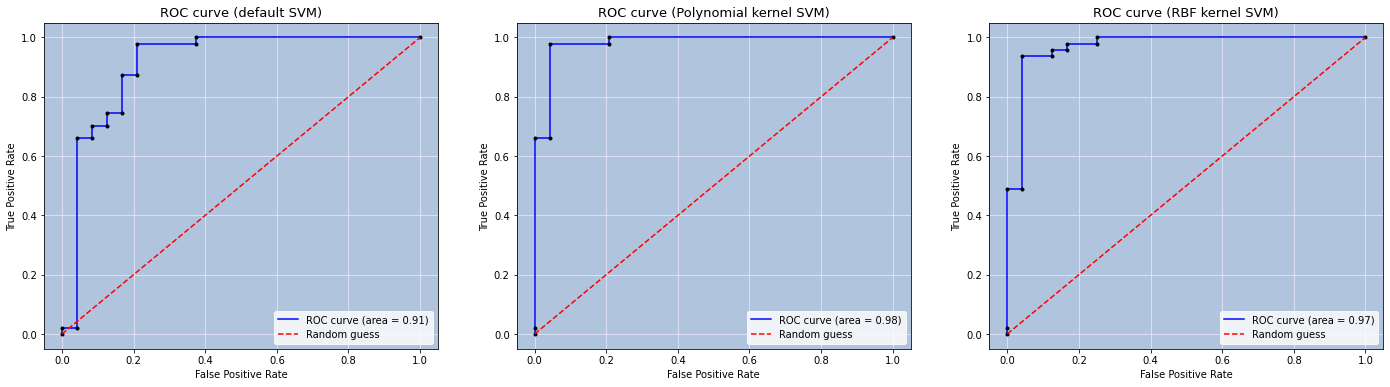

In [17]:
auc_roc = plt_roc(test_res, svc.predict_proba(test_val), svc_pol.predict_proba(test_val),svc_rbf.predict_proba(test_val))  

We will also use weighted macro-averaging score in case of class imbalances. This metric is resistant to an inbalanced classes (as in the case of this dataset). Cause the weighted macro-average is calculated by weighting the score of each class label by the number of true instances when calculating the average. This metric will be the **main** in this task.

**F1-score** for all models:

In [18]:
from sklearn.metrics import f1_score
score, labels = [], ['Def: F1', 'Poly: F1', 'RBF: F1', 'Def: AUC-ROC', 'Poly: AUC-ROC', 'RBF: AUC-ROC']
score.append(f1_score(test_res, pred_res, average='weighted'))
score.append(f1_score(test_res, pred_pol, average='weighted'))
score.append(f1_score(test_res, pred_rbf, average='weighted'))
score

[0.8668111057069292, 0.9430240865482751, 0.9133763620685149]

Comparison bar of **F1-score** and **AUC-ROC** for each model:

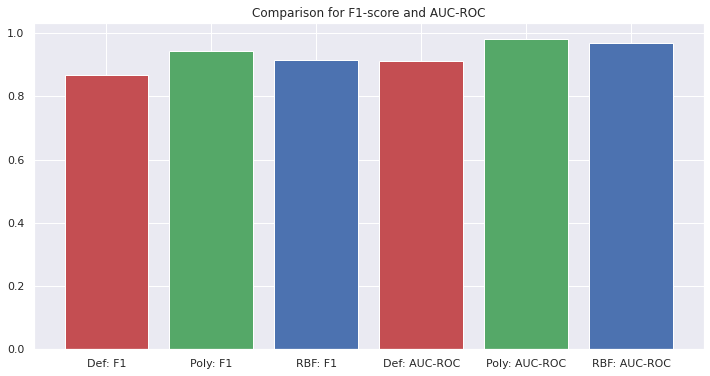

In [54]:
fig, ax = plt.subplots()
x = score + auc_roc
ax.bar(labels, x, color=['r', 'g', 'b'])
ax.set_title('Comparison for F1-score and AUC-ROC')
sns.set_theme()
fig.set_figwidth(12)   
fig.set_figheight(6)   
plt.show()

Thus, the results show that for a given dataset the **Polynomial Kernel** has the best performance (best F1-score and AUC-ROC), due to the fact that the data was initially standardized, and then also preprocessed. 

The **RBF Kernel** showed itself quite well (2-nd F1-score and 2-nd AUC-ROC), but the gap is insignificant.

The **default SVM** is on the last place, but the gap isn't huge.

Thus, it is very likely that the data is not divided linearly.

We will use a **Random Forest** algorithm to determine the features that give the greatest contribution.

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier(n_estimators=100)
clf.fit(train_val, train_res)

RandomForestClassifier()

In [27]:
y_pred = clf.predict(test_val)
print(classification_report(test_res, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89        24
           1       0.92      0.98      0.95        47

    accuracy                           0.93        71
   macro avg       0.94      0.91      0.92        71
weighted avg       0.93      0.93      0.93        71



In [28]:
feature_imp = pd.Series(clf.feature_importances_, index=np.arange(1,35)).sort_values(ascending=False)
feature_imp[:10] 

5     0.116576
27    0.094884
3     0.089961
7     0.072778
4     0.048200
8     0.040742
24    0.036917
28    0.035485
6     0.033635
29    0.032820
dtype: float64

So, the 5, 3, 27 features make the most impact for the classification result.

Distribution of good (cyan) and bad (darkviolet) signals in space (5, 3, 27) features:

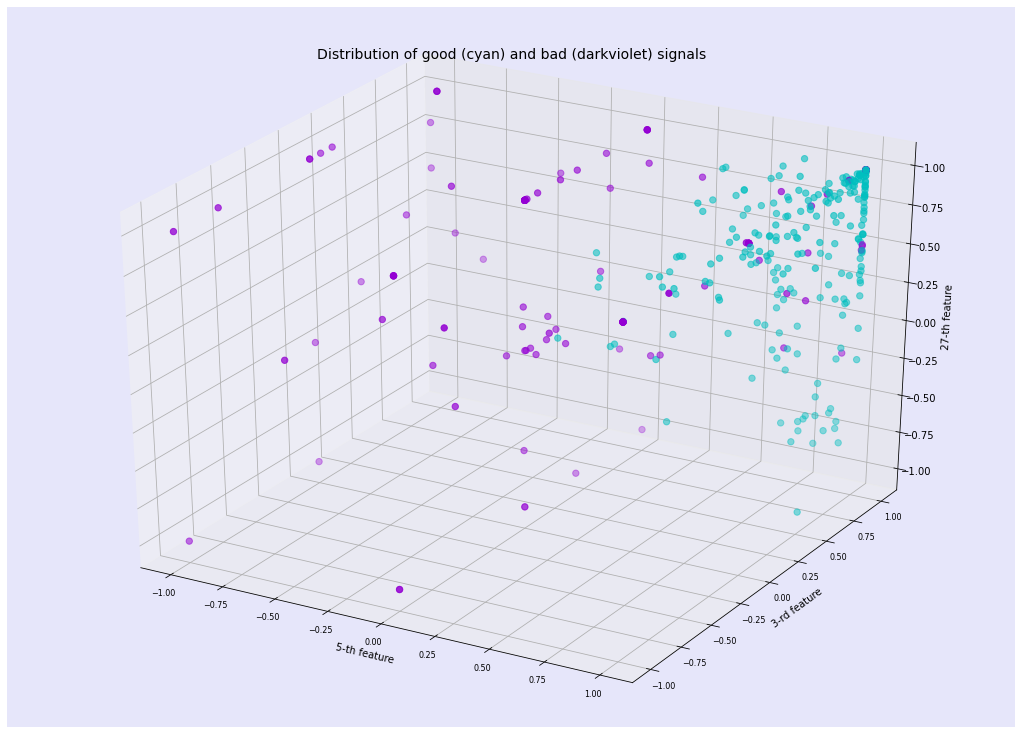

In [29]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(14)
ax = Axes3D(fig)
ax.set_facecolor('lavender')
ax.set_xlabel('5-th feature'), ax.set_ylabel('3-rd feature')
ax.set_zlabel('27-th feature')
plt.title('Distribution of good (cyan) and bad (darkviolet) signals', fontsize=14)
plt.xticks(fontsize=8), plt.yticks(fontsize=8)
colordict = {0:'darkviolet', 1:'c'}
tmp = data['result'].apply(lambda x: colordict[x])
ax.scatter(values[5], values[3], values[27], c=tmp, s=40) # depthshade on

Distribution of good (cyan) and bad (darkviolet) signals on projections:

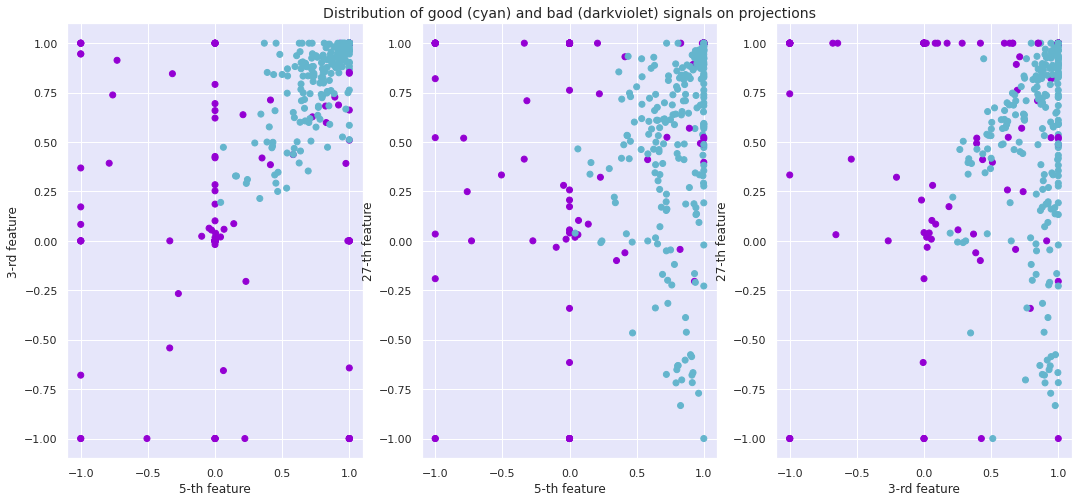

In [47]:
fig, (ax_1, ax_2, ax_3) = plt.subplots(1,3)
ax_1.set_facecolor('lavender')
ax_2.set_facecolor('lavender')
ax_3.set_facecolor('lavender')
ax_2.set_title('Distribution of good (cyan) and bad (darkviolet) signals on projections', fontsize=14)
ax_1.set_xlabel('5-th feature'), ax_1.set_ylabel('3-rd feature')
ax_2.set_xlabel('5-th feature'), ax_2.set_ylabel('27-th feature')
ax_3.set_xlabel('3-rd feature'), ax_3.set_ylabel('27-th feature')
fig.set_figheight(8)
fig.set_figwidth(18)
ax_1.scatter(values[5], values[3], c=tmp)
ax_2.scatter(values[5], values[27], c=tmp)
ax_3.scatter(values[3], values[27], c=tmp)
sns.set_theme(style='darkgrid')

Thus, each projection can be divided linearly into 2 classes, but there will be a lot of FN and FP errors. Our assumption about the nonlinearity of the data was confirmed, when considering an attempt to divide data in the space of features having the greatest contribution for the classification.

# **Application of сross-validation for reliable verification of models.**

The K-Fold method gives a more reliable assessment of the quality of the model, since the training and testing of the model take place on different subsets of the original dataset.
Let's find out which model will be the best in case of cross-validation.

Thus, we will use **K-Fold Cross-Validation** with k = 5.

In [31]:
from sklearn.model_selection import KFold
def_svc = SVC(kernel='linear', probability=True)
cv = KFold(n_splits=5, shuffle=True)

These functions will draw ROC curve for every instance.

In [32]:
def plot_roc(ax, fpr_t, tpr_t, area, name):
  ax.set_facecolor('lightsteelblue')
  ax.plot(fpr_t, tpr_t,'b-', label = f'ROC curve (area = {area:0.2f})')
  ax.plot(fpr_t, tpr_t,'.k')
  ax.plot([0,1], [0,1],'r-', linestyle='dashed', label = 'Random guess')
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.set_title(f'ROC curve ({name})')
  ax.grid(visible=True, c='lavender')
  legend = ax.legend(frameon = 1, loc='lower right')
  frame = legend.get_frame()
  frame.set_color('w')

SVM **Hyperparameter Tuning** using GridSearchCV and scoring by **weighted F1-score**:

In [33]:
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score , average='weighted')

In [34]:
from sklearn.model_selection import GridSearchCV
def calc_hyperrapams(name_md, param_grid):
  grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0, scoring=f1)
  grid.fit(train_val, train_res)
  print(grid.best_params_)

Dict of parameters **C** and **gamma** for our kernels:

In [35]:
param_grid_def = {'C': [0.001, 0.01, 0.5, 1, 100], 
              'kernel': ['linear']} # linear kernel has only C param
param_grid_pol = {'C': [ 0.01, 0.1, 1, 10, 100], 
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'kernel': ['poly']} 
param_grid_rbf = {'C': [0.001, 0.01, 0.1, 1, 10], 
              'gamma': [0.001, 0.01, 0.1, 1.5, 10, 100],
              'kernel': ['rbf']}                             

Drawing **ROC curve** graphs for every instance in K-fold method:

In [36]:
def draw_plots(mod_name, matrix, val, res, name, test_va, params):
  fig = plt.figure(figsize=(24,12))
  
  spec = mpl.gridspec.GridSpec(ncols=6, nrows=2) 
  axes, i = [0]*5, 1
  ax_iter = iter(axes)
  spec_iter = iter((spec[0,0:2], spec[0,2:4], spec[0,4:], spec[1,1:3], spec[1,3:5]))
  for train_index, test_index in matrix:
    model = SVC(kernel=mod_name, probability=True)
    tmp = next(ax_iter)
    tmp = fig.add_subplot(next(spec_iter))
    train_x, train_y = val.iloc[train_index], res.iloc[train_index]
    test_x, test_y = val.iloc[test_index], res.iloc[test_index]

    model.fit(train_x, train_y)
    calc_hyperrapams(mod_name, params)

    fpr, tpr, thresholds = roc_curve(test_y, model.predict_proba(test_x)[:,1])
    roc_area = auc(fpr, tpr)
    plot_roc(tmp, fpr, tpr, roc_area, f'{name}: {i} instance in KFolds') 
    i += 1    

Results for default SVM model:

{'C': 1, 'kernel': 'linear'}
{'C': 1, 'kernel': 'linear'}
{'C': 1, 'kernel': 'linear'}
{'C': 1, 'kernel': 'linear'}
{'C': 1, 'kernel': 'linear'}


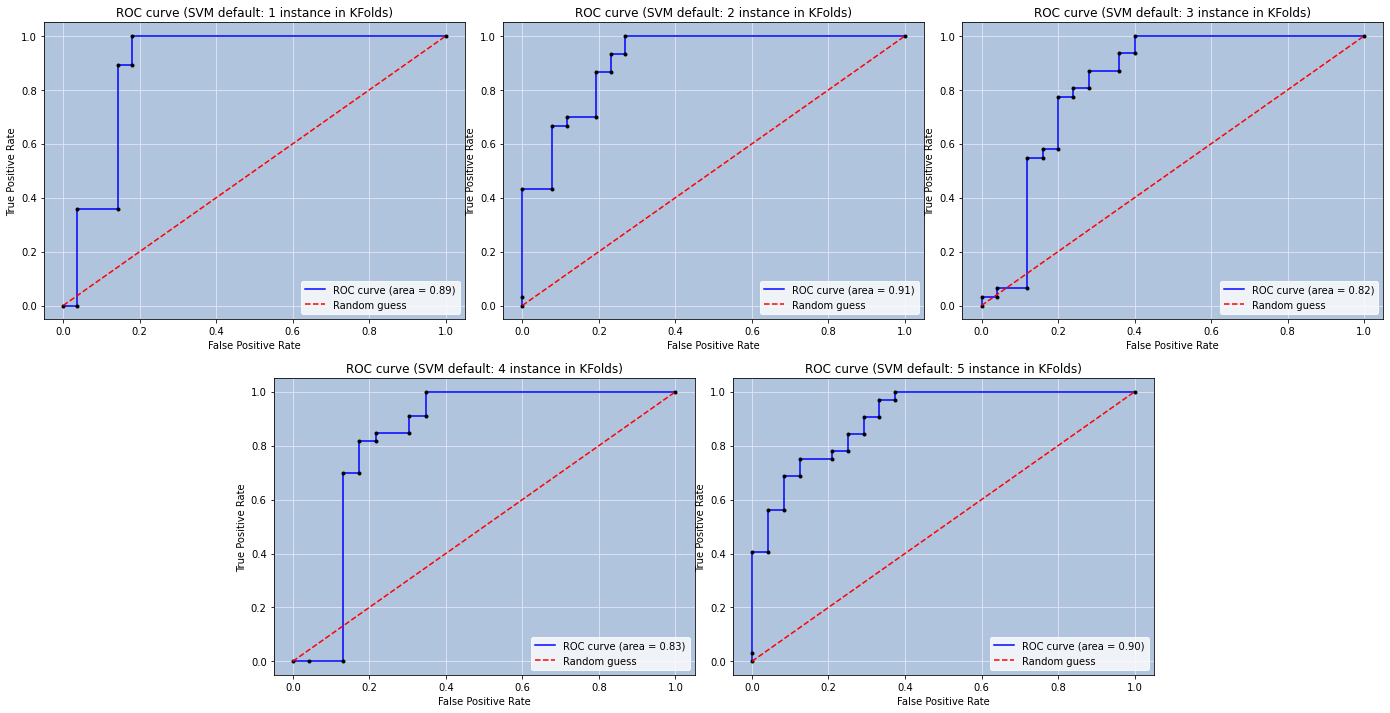

In [37]:
draw_plots('linear', cv.split(train_val), values, results, 'SVM default', test_val, param_grid_def)

In [38]:
answer_lst_f1, answer_lst_area = [], []

Thus, after hyperparameter tuning using **GridSearchCV**, we will create the default SVM model with C = 1:

In [39]:
new_def = SVC(kernel='linear', probability=True, C=1)
new_def.fit(train_val, train_res)
answer_lst_f1.append(f1_score(test_res, new_def.predict(test_val), average='weighted'))
print(f'F1-score for default SVM after tuning: {answer_lst_f1[0]}')
fpr_d, tpr_d, thresholds_d = roc_curve(test_res, new_def.predict_proba(test_val)[:,1])
answer_lst_area.append(auc(fpr_d, tpr_d))
print(f'AUC-ROC for default SVM after tuning: {answer_lst_area[0]}')

F1-score for default SVM after tuning: 0.8668111057069292
AUC-ROC for default SVM after tuning: 0.9131205673758865


Results for Polynomial kernel SVM:

{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}
{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}
{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}
{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}
{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}


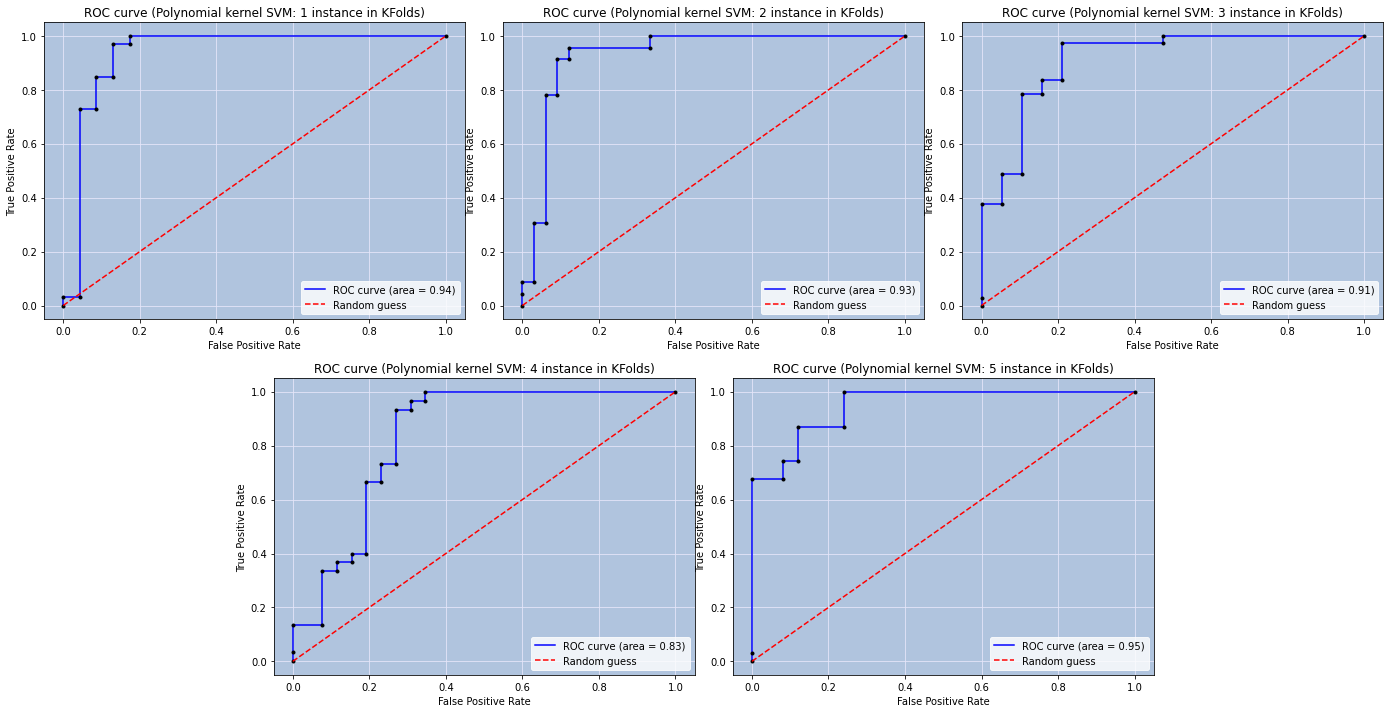

In [40]:
pol_svc = SVC(kernel='poly', probability=True)
draw_plots('poly', cv.split(train_val), values, results, 'Polynomial kernel SVM', test_val, param_grid_pol)

Thus, after hyperparameters tuning using **GridSearchCV**, we will create the Polynomial kernel SVM model with C = 1 and gamma = 0.1:

In [41]:
new_pol = SVC(kernel='poly', C=1, gamma=0.1, probability=True)
new_pol.fit(train_val, train_res)
answer_lst_f1.append(f1_score(test_res, new_pol.predict(test_val), average='weighted'))
print(f'F1-score for Poly SVM after tuning: {answer_lst_f1[1]}')
fpr_p, tpr_p, thresholds_p = roc_curve(test_res, new_pol.predict_proba(test_val)[:,1])
answer_lst_area.append(auc(fpr_p, tpr_p))
print(f'AUC-ROC for Poly SVM after tuning: {answer_lst_area[1]}')

F1-score for Poly SVM after tuning: 0.8981660694729807
AUC-ROC for Poly SVM after tuning: 0.9414893617021276


{'C': 1, 'gamma': 1.5, 'kernel': 'rbf'}
{'C': 1, 'gamma': 1.5, 'kernel': 'rbf'}
{'C': 1, 'gamma': 1.5, 'kernel': 'rbf'}
{'C': 1, 'gamma': 1.5, 'kernel': 'rbf'}
{'C': 1, 'gamma': 1.5, 'kernel': 'rbf'}


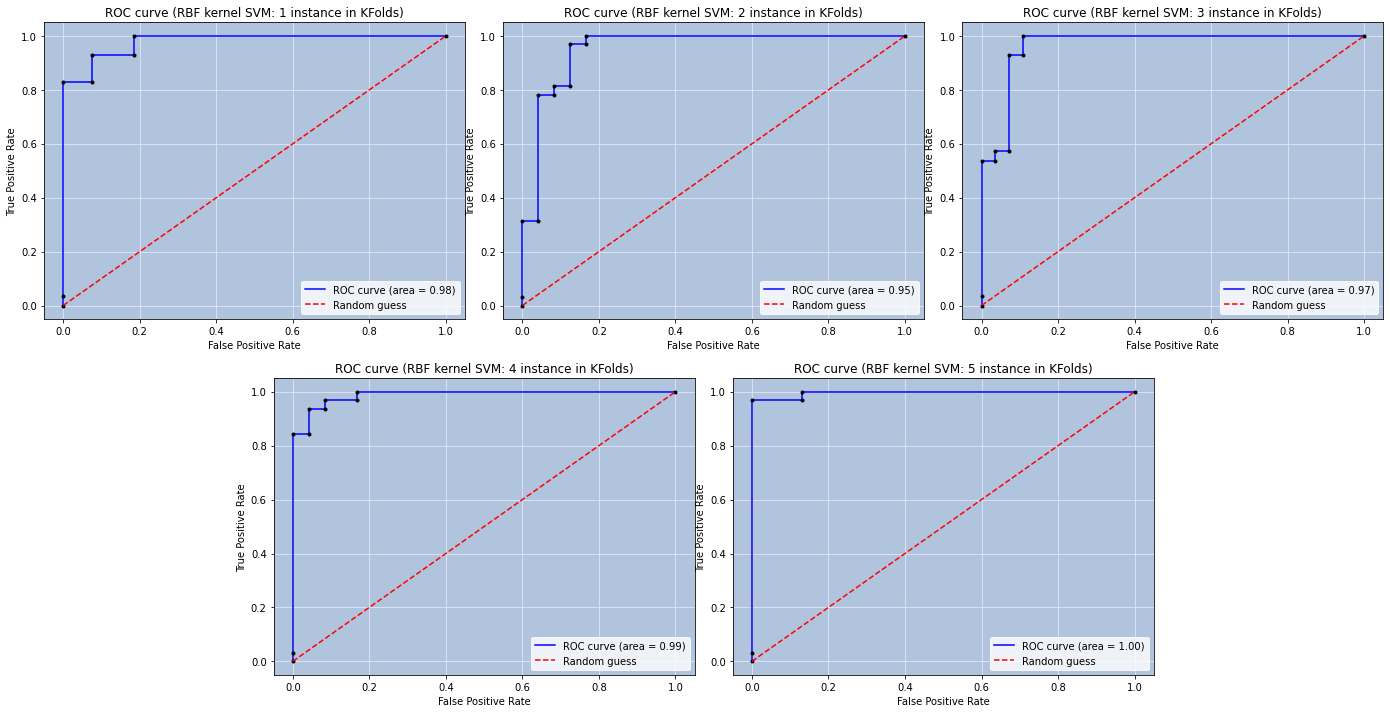

In [42]:
rbf_svc = SVC(kernel='rbf', probability=True)
draw_plots('rbf', cv.split(train_val), values, results, 'RBF kernel SVM', test_val, param_grid_rbf)

Thus, after hyperparameters tuning using **GridSearchCV**, we will create the RBF kernel SVM model with C = 1 and gamma = 1.5:

In [43]:
new_rbf = SVC(kernel='rbf', probability=True, C=1, gamma=1.5)
new_rbf.fit(train_val, train_res)
answer_lst_f1.append(f1_score(test_res, new_rbf.predict(test_val), average='weighted'))
print(f'F1-score for RBF SVM after tuning: {answer_lst_f1[2]}')
fpr_r, tpr_r, thresholds_r = roc_curve(test_res, new_rbf.predict_proba(test_val)[:,1])
answer_lst_area.append(auc(fpr_r, tpr_r))
print(f'AUC-ROC for RBF SVM after tuning: {answer_lst_area[2]}')

F1-score for RBF SVM after tuning: 0.929198933804394
AUC-ROC for RBF SVM after tuning: 0.9840425531914894


**Final comparison** for **F1-score** and **AUC-ROC** without and with cross-validation with method K-folds:

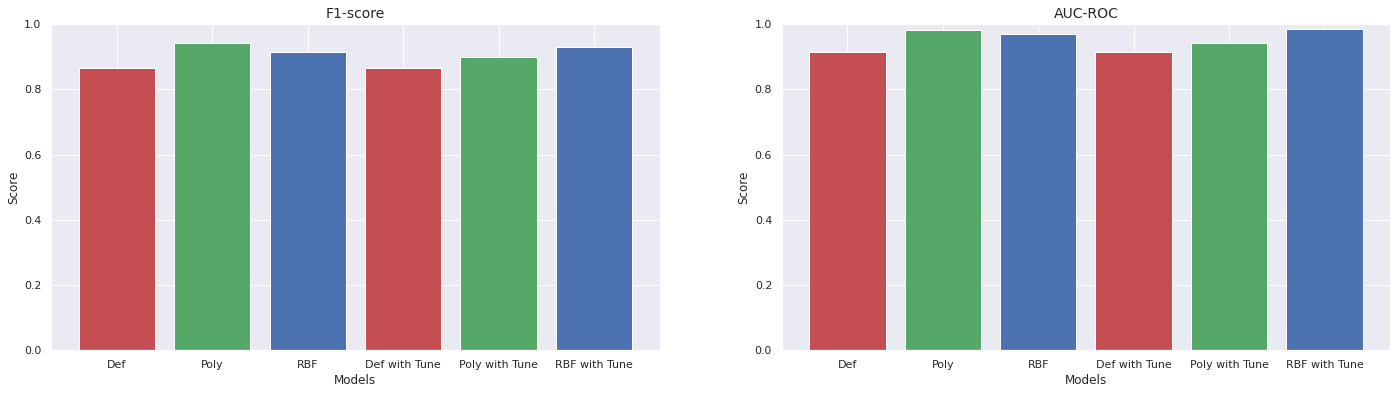

In [48]:
fig, ax = plt.subplots(1,2)
x = [score + answer_lst_f1, auc_roc + answer_lst_area]
y = [['Def', 'Poly', 'RBF', 'Def with Tune', 
      'Poly with Tune', 'RBF with Tune'],
      ['Def', 'Poly', 'RBF', 'Def with Tune'
      , 'Poly with Tune', 'RBF with Tune']]
ax[0].bar(y[0], x[0], color=['r', 'g', 'b'])
ax[0].set_title('F1-score', fontsize=14)
ax[0].set_xlabel('Models'), ax[0].set_ylabel('Score')
ax[0].set_ylim([0,1.0])
ax[1].bar(y[1], x[1], color=['r', 'g', 'b'])
ax[1].set_title('AUC-ROC', fontsize=14)
ax[1].set_xlabel('Models'), ax[1].set_ylabel('Score')
ax[1].set_ylim([0,1.0])
sns.set_theme(style="whitegrid", palette='pastel')
fig.set_figwidth(24)   
fig.set_figheight(6)   
plt.show()

Final comparison of SVM models with different kernels shows that using the K-Fold method gives real estimates of the models.

Thus, the results show that for a given dataset (in which the data is not divided linearly), the RBF Kernel has the best performance. This is the advantage of this method, which projects the high dimensional data and then searches a linear separation for it. That's why the RBF Kernel shows better result than other kernels on the current dataset. 

The results in case of non-use the cross-validation are overestimated.

In practice, when adding information to the current dataset, the RBF kernel SVM model will perform better than the other kernels. The K-Fold method gives a more reliable assessment of the quality of the model.